In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
%pylab inline
import matplotlib.pyplot as plt

df = pd.read_excel('C:/Users/eli/Desktop/yelp.xlsx')

Populating the interactive namespace from numpy and matplotlib


In [108]:
all_sheets = pd.read_excel('C:/Users/eli/Desktop/yelp.xlsx', sheet_name = [0, 1, 2])
df_cities =  all_sheets[1]
df_cities.head()

,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [109]:
df = pd.merge(left = df, right = df_cities, how = 'inner', left_on = 'city_id', right_on = 'id')
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [110]:
df_states = all_sheets[2]
df_states.head()

,id,state
0,1,PA
1,2,NV


In [111]:
df = pd.merge(left= df, right = df_states, how = 'inner', left_on = 'state_id', right_on = 'id')
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [112]:
df_pitt = df[df['city'] == 'Pittsburgh']
df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,8,Pittsburgh,1,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,8,Pittsburgh,1,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,8,Pittsburgh,1,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,8,Pittsburgh,1,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,8,Pittsburgh,1,PA


In [113]:
df_vegas = df[df['city'] == 'Las Vegas']
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,12,Las Vegas,2,NV
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,12,Las Vegas,2,NV
432,The Studio,Shopping,Adult,False,7,5.0,12,2,12,Las Vegas,2,NV
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,12,Las Vegas,2,NV
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,12,Las Vegas,2,NV


In [114]:
pitt_stars = df_pitt['stars']
vegas_stars = df_vegas['stars']
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

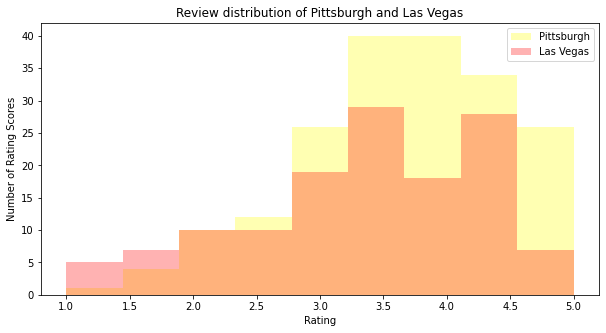

In [62]:
plt.figure(figsize=(10,5))
plt.hist(
    pitt_stars,
    alpha = 0.3,
    color = 'yellow',
    label = 'Pittsburgh',
    bins = 'auto'
)

plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'red',
    label = 'Las Vegas',
    bins = 'auto'
)

plt.title('Review distribution of Pittsburgh and Las Vegas')
plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')
plt.legend(loc = 'best')


plt.show()

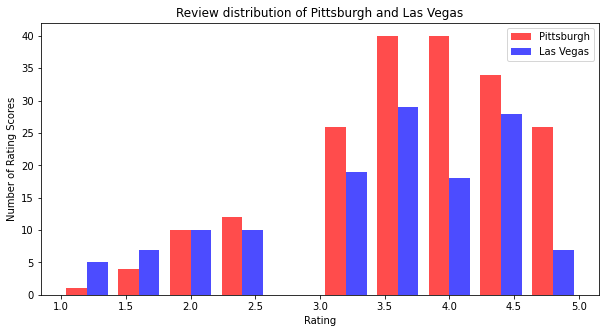

In [53]:
plt.figure(figsize=(10,5))
plt.hist(
    [pitt_stars, vegas_stars],
    alpha = 0.7,
    color = ['red', 'blue'],
    label = ['Pittsburgh', 'Las Vegas'],
    bins = 'auto'
)

plt.title('Review distribution of Pittsburgh and Las Vegas')
plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')
plt.legend(loc = 'best')

plt.show()

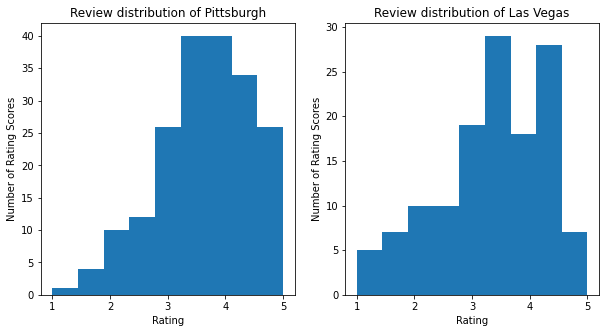

In [44]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = pitt_stars, bins = 'auto')
plt.title("Review distribution of Pittsburgh")
plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')
 
plt.subplot(1,2,2)
plt.hist(x = vegas_stars, bins = 'auto')
plt.title("Review distribution of Las Vegas")
plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')


plt.show()

In [85]:
df_health = df[df['category_0'] == "Health & Medical"]
df_fast = df[df['category_0'] == "Fast Food"]
df_break = df[df['category_0'] == "Breakfast & Brunch"]
df_break.head(100)

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1
301,Denny's,Breakfast & Brunch,American (Traditional),True,77,2.5,11,2
302,Mimi's Cafe,Breakfast & Brunch,American (Traditional),True,160,3.5,11,2
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2
473,Blueberry Hill Family Restaurant,Breakfast & Brunch,Diners,True,333,3.5,12,2
563,Denny's,Breakfast & Brunch,American (Traditional),True,30,2.5,13,2


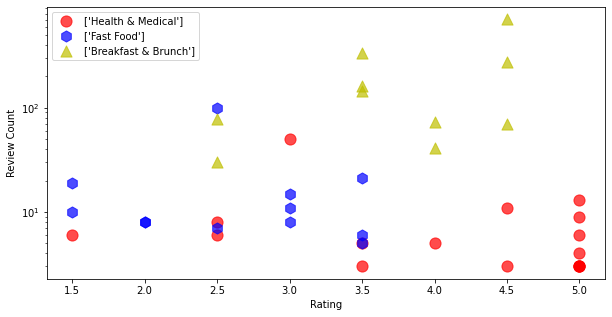

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(
    df_health["stars"],df_health["review_count"],
    marker = 'o',
    color ='r',
    alpha = 0.7,
    s = 124,
    label = ["Health & Medical"]
)

plt.scatter(
    df_fast["stars"],df_fast["review_count"],
    marker = 'h',
    color ='b',
    alpha = 0.7,
    s = 124,
    label = ["Fast Food"]
)

plt.scatter(
    df_break["stars"],df_break["review_count"],
    marker = '^',
    color ='y',
    alpha = 0.7,
    s = 124,
    label = ["Breakfast & Brunch"]
)

plt.xlabel('Rating')
plt.ylabel("Review Count")
plt.legend(loc = 'upper left')

axes = plt.gca()
axes.set_yscale('log')

plt.show()

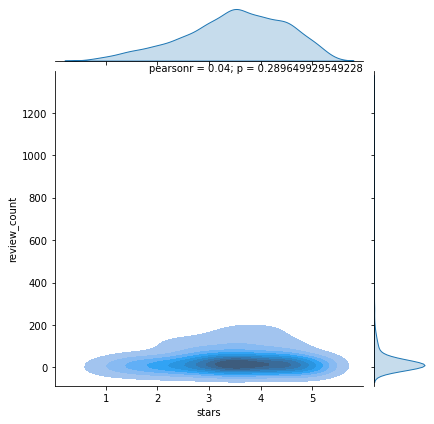

In [70]:
# jointplot returns a jointgrid, which we need to assign to a variable in order to add an annotation
# This line is almost like the original, but it seems that fill is needed explicitly now.
# And most importantly, ".annotate" is not just deprecated. It's gone.
jg = sns.jointplot(x='stars', y='review_count', data=df, kind='kde', fill=True)
 
# To get the correlation, we need to consider only the records with NA values for either measurement.
df_no_nulls = df[['stars', 'review_count']].dropna()
pearsonr, p = stats.pearsonr(df_no_nulls.stars, df_no_nulls.review_count)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'
 
# Placing the annotation somewhere readable requires that we find the max of the axes
jg.ax_joint.text(
    jg.ax_joint._axes.xaxis.get_data_interval()[1], 
    jg.ax_joint._axes.yaxis.get_data_interval()[1], 
    pearson_str, 
    horizontalalignment='right')
plt.show()

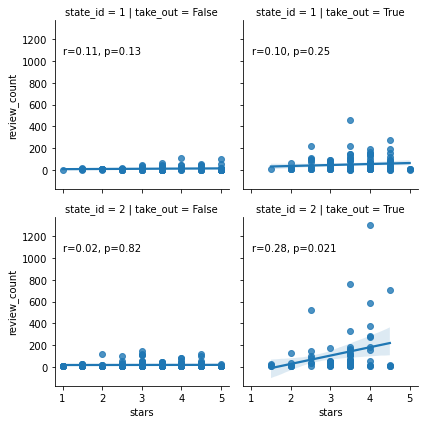

In [84]:
# How to create correlation coefficiant for many plots
# drop all nulls
df_no_nulls = df[['stars', 'review_count','state_id', 'take_out']].dropna()
 
# create plot
g = sns.lmplot(x = 'stars', y = 'review_count', data = df_no_nulls, row = 'state_id', col = 'take_out',height=3, aspect=1)
 
# create function about how to calculate correlation
def annotate(data, **kws):
    r, p = stats.pearsonr(data['stars'], data['review_count'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# map correlation to every plot    
g.map_dataframe(annotate)

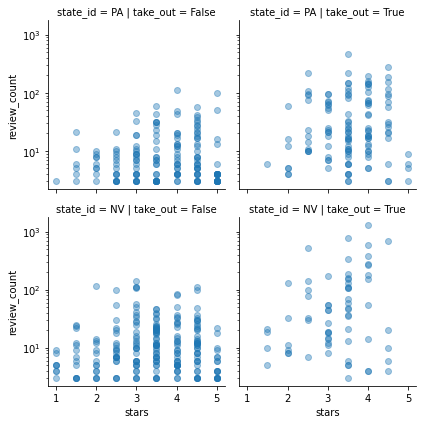

In [117]:
# Construct a grid of scatterplots between stars and review_count.
# Stratify the plots by state_id (rows) and by take_out (columns).
df['state_id'] = df.state_id.replace({1: "PA", 2: "NV"})
sns.FacetGrid(df, row='state_id',  col='take_out').map(
    plt.scatter, 'stars','review_count', alpha=0.4).add_legend()

axes = plt.gca()
axes.set_yscale('log')

C:\Users\eli\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


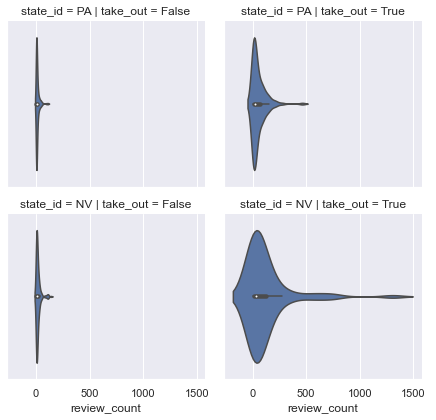

In [138]:
# Use "violin plots" to compare the distributions of stars within groups defined by state and take_out.
sns.set(style='darkgrid')
sns.FacetGrid(df, row='state_id', col='take_out').map(
    sns.violinplot, 'review_count', alpha=0.4).add_legend()


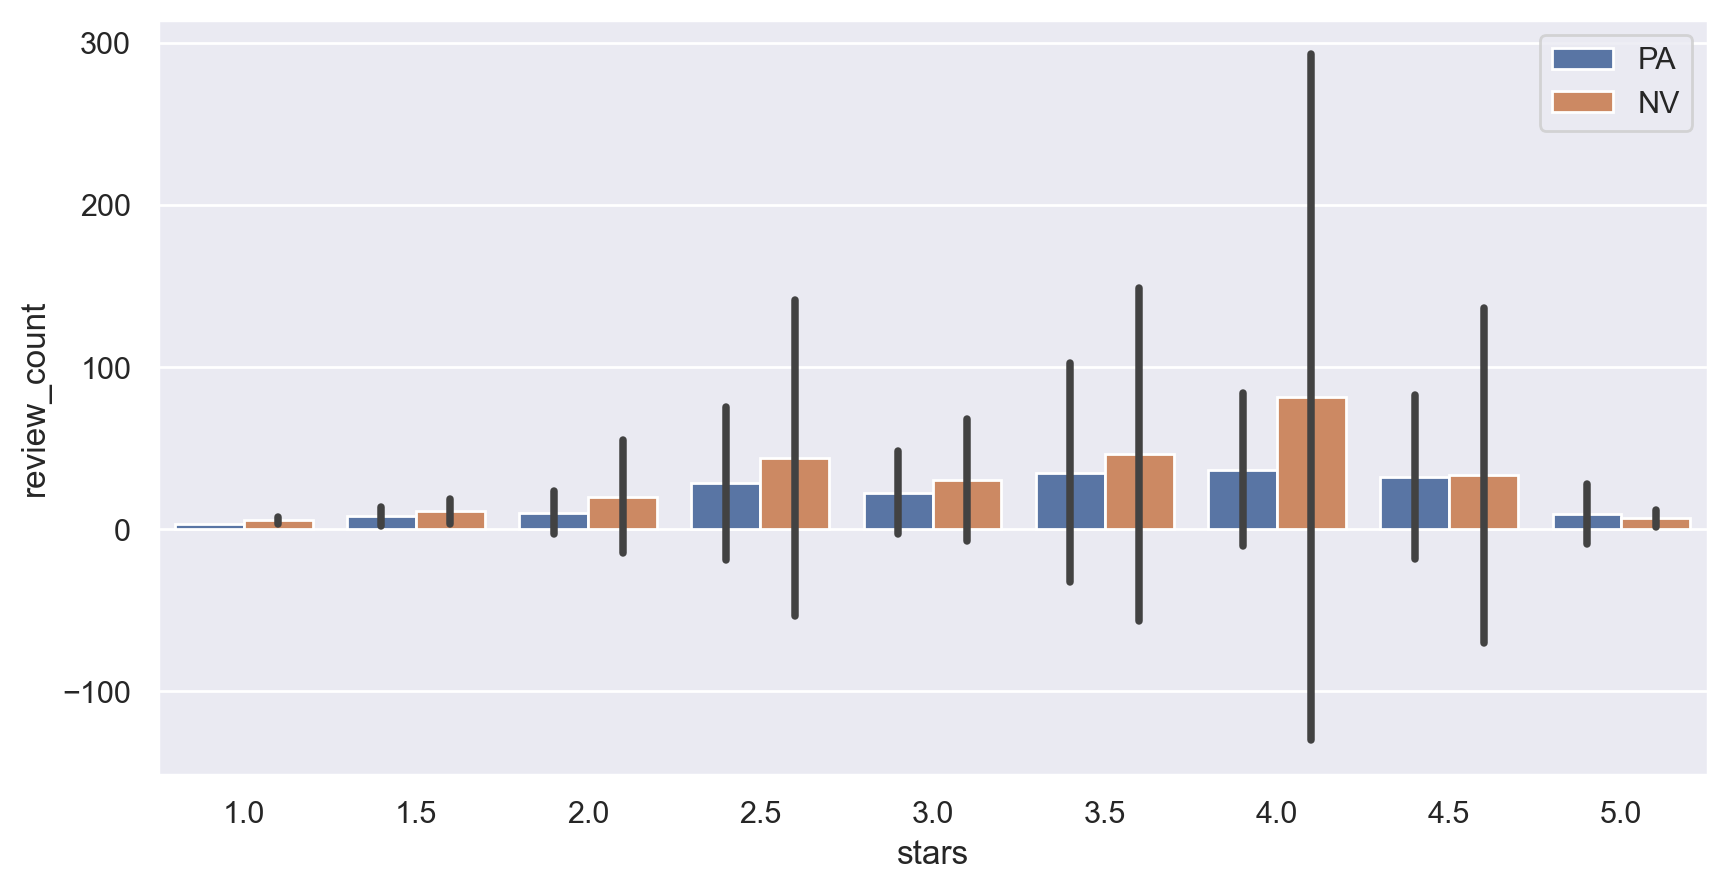

In [137]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5), dpi = 200)
barplot = sns.barplot(data=df, x = 'stars', y = 'review_count', estimator = np.mean, ci = 'sd', hue = 'state')
plt.legend(bbox_to_anchor=(1.00,1))

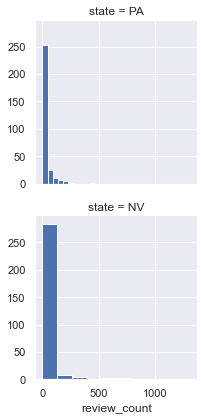

In [145]:
# Create a histogram of the review_count grouped by state
g = sns.FacetGrid(df, row = 'state')
g = g.map(plt.hist, 'review_count')

Text(0.5, 1.0, 'Total review_count for Bottom Half of States')

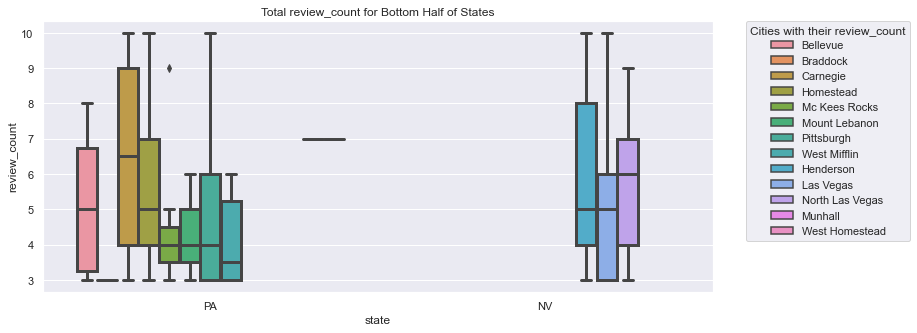

In [152]:
# Total review_count for Bottom Half of States
plt.figure(figsize=(12,5))
bottom_half_states = df.nsmallest(n=int(0.5*len(df)),columns='review_count')
 
box_plot = sns.boxplot(x ='state', y = 'review_count',  hue ='city', data = bottom_half_states,linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Cities with their review_count')
plt.title('Total review_count for Bottom Half of States')